In [90]:
from datetime import datetime as dt
from datetime import timedelta
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
data_path = Path("data")

In [117]:
df_weather.to_csv()

,date,temperature,precipitation,windSpeed,windDirection,humidity,spotAtmosphericPressure,groundTemperature
0,2018-01-01 00:00,-3.2,0.0,0.5,110.0,40.0,1015.4,-2.2
1,2018-01-01 01:00,-3.3,0.0,0.7,360.0,41.0,1015.1,-2.7
2,2018-01-01 02:00,-3.7,0.0,0.9,270.0,42.0,1015.2,-3.0
3,2018-01-01 03:00,-4.0,0.0,1.0,290.0,44.0,1015.5,-3.5
4,2018-01-01 04:00,-4.2,0.0,1.1,290.0,53.0,1015.5,-3.8
...,...,...,...,...,...,...,...,...
26299,2020-12-31 19:00,-7.1,0.0,2.4,250.0,58.0,1014.2,-4.3
26300,2020-12-31 20:00,-7.1,0.0,3.2,250.0,59.0,1014.8,-5.2
26301,2020-12-31 21:00,-7.2,0.0,2.7,250.0,61.0,1015.3,-5.7
26302,2020-12-31 22:00,-7.4,0.0,2.5,270.0,66.0,1016.0,-6.1


In [118]:
df_airq = pd.read_csv(data_path / "airq_filled_by_gu_2018-2020.tsv", encoding="utf-8", sep="\t")
df_airq = df_airq.loc[(df_airq.district != "강북구")]
df_weather = pd.read_csv(data_path / "weather_filled_2018-2020.tsv", encoding="utf-8", sep="\t")



df_airq_baek = pd.read_csv(data_path / "airq_baek_filled_2018-2020.tsv", encoding="utf-8", sep="\t")
df_airq_baek = df_airq_baek.loc[:, ['measurename', 'date', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'PM10_AQI', 'PM25_AQI']].rename(columns={"measurename": "district"})
df_weather_baek = pd.read_csv(data_path / "weather_baek_filled_2018-2020.tsv", encoding="utf-8", sep="\t")

df_traffic = pd.read_csv(data_path / "traffic_filled_by_gu_2018-2020.tsv", encoding="utf-8", sep="\t")


In [129]:
df_airq["date"] = pd.to_datetime(df_airq["date"])
df_weather["date"] = pd.to_datetime(df_weather["date"])

df_airq_baek["date"] = pd.to_datetime(df_airq_baek["date"])
df_weather_baek["date"] = pd.to_datetime(df_weather_baek["date"])
df_traffic["date"] = pd.to_datetime(df_traffic["date"])


In [134]:
df_airq.merge(df_weather, on="date").to_csv(data_path / "df_seoul.tsv", encoding="utf-8", sep="\t", index=False)
df_airq_baek.merge(df_weather_baek, on="date").to_csv(data_path / "df_baek.tsv", encoding="utf-8", sep="\t", index=False)

In [137]:
df_airq_weather

## conver to category


https://www.airnow.gov/aqi/aqi-basics/

|Daily AQI Color|Levels of Concern|Values of Index|Description of Air Quality
|---|---|---|---
|Green|Good|0 to 50|Air quality is satisfactory, and air pollution poses little or no risk.
|Yellow|Moderate|51 to 100|Air quality is acceptable. However, there may be a risk for some people, particularly those who are unusually sensitive to air pollution.
|Orange|Unhealthy for Sensitive Groups|101 to 150|Members of sensitive groups may experience health effects. The general public is less likely to be affected.
|Red|Unhealthy|151 to 200|Some members of the general public may experience health effects; members of sensitive groups may experience more serious health effects.
|Purple|Very Unhealthy|201 to 300|Health alert: The risk of health effects is increased for everyone.
|Maroon|Hazardous|301 and higher|Health warning of emergency conditions: everyone is more likely to be affected.

In [31]:
def get_aqi_cate(c):
    if (c >= 0) and (c <= 50):
        return 0
    elif (c > 50) and (c <= 100):
        return 1
    elif (c > 100) and (c <= 150):
        return 2
    elif (c > 150) and (c <= 200):
        return 3
    elif (c > 200) and (c <= 300):
        return 4
    elif (c > 300):
        return 5
    else:
        return -1

In [53]:
df_airq["PM10_AQI_CATE"] = df_airq["PM10_AQI"].apply(get_aqi_cate)
df_airq["PM25_AQI_CATE"] = df_airq["PM25_AQI"].apply(get_aqi_cate)
df_airq_baek["PM10_AQI_CATE"] = df_airq_baek["PM10_AQI"].apply(get_aqi_cate)
df_airq_baek["PM25_AQI_CATE"] = df_airq_baek["PM25_AQI"].apply(get_aqi_cate)

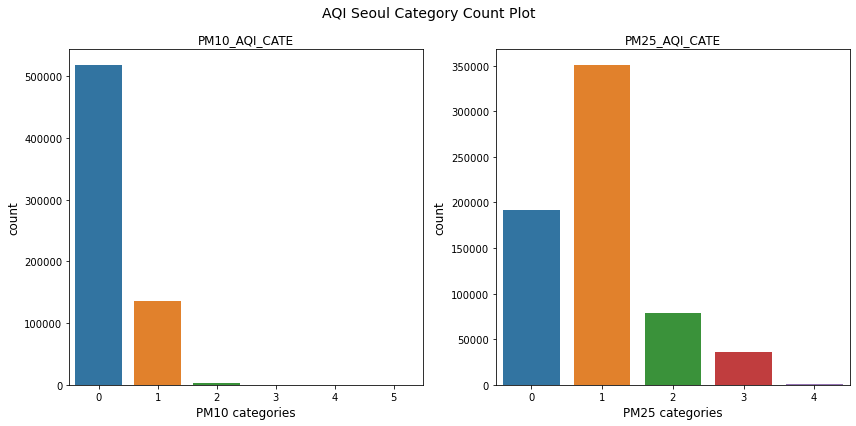

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for ax, x in zip(axes.flatten(), ["PM10_AQI_CATE", "PM25_AQI_CATE"]):
    sns.countplot(x=x, data=df_airq, ax=ax)
    ax.set_title(f"{x}", fontsize=12)
    ax.set_xlabel(f"{x.split('_')[0]} categories", fontsize=12)
    ax.set_ylabel("count", fontsize=12)
fig.suptitle("AQI Seoul Category Count Plot", fontsize=14)
plt.tight_layout()
plt.show()

fig.savefig("AQI Seoul Category Count Plot.png")

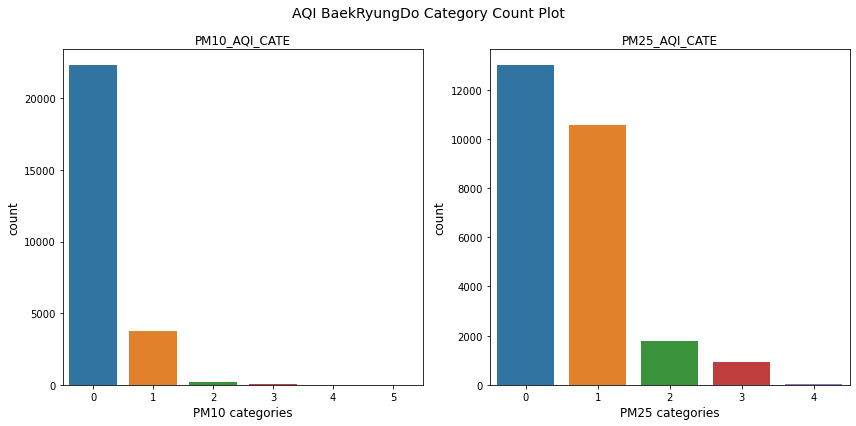

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for ax, x in zip(axes.flatten(), ["PM10_AQI_CATE", "PM25_AQI_CATE"]):
    sns.countplot(x=x, data=df_airq_baek, ax=ax)
    ax.set_title(f"{x}", fontsize=12)
    ax.set_xlabel(f"{x.split('_')[0]} categories", fontsize=12)
    ax.set_ylabel("count", fontsize=12)
fig.suptitle("AQI BaekRyungDo Category Count Plot", fontsize=14)
plt.tight_layout()
plt.show()

fig.savefig("AQI BaekRyungDo Category Count Plot.png")

In [76]:
df = df_airq

In [89]:
gu2idx = dict(enumerate(df["district"].unique()))
idx2gu = {v: k for k, v in gu2idx.items()}

In [80]:
df["group"] = df["date"].dt.strftime("%Y-%m-%d")

In [81]:
test_set_year_mask = df_airq["date"].dt.year == 2020
df_train = df.loc[~test_set_year_mask, :]
df_test = df.loc[test_set_year_mask, :]

In [61]:
def sliding_window(T: int, window_size: int, time_lag: int):
    X_idx = np.expand_dims(np.arange(window_size), 0) + \
                np.expand_dims(np.arange(T - window_size - time_lag + 1), 0).T
    y_idx = np.arange(time_lag + window_size - 1 , T)
    
    return X_idx, y_idx

In [ ]:
window_size=24

In [62]:
T = len(df_train)

In [63]:
X_idx, y_idx = sliding_window(T: int, window_size: int, time_lag: int)

438000